In [1]:
import numpy as np

In [2]:
def K0_weiss(S,TC):
 TK=TC+273.15 #Temperature from Celsius to Kelvin
 lnK0 = (9345.17/TK) - 60.2409 + 23.3585 * np.log(TK/100) + S * (0.023517- 0.00023656 * TK + 4.7036e-07 * TK * TK)
 K0=np.exp(lnK0)
 return K0

print(K0_weiss(35,25))

0.028391881804015685


In [3]:
def K1_weiss(S,TC):
  TK=TC+273.15
  term1 = 2.83655 - (2307.1266 / TK) - 1.5529413 * np.log(TK)
  term2 = (0.207608410 + 4.0484 / TK) * np.sqrt(S)
  term3 = 0.0846834 * S - 0.00654208 * S**1.5 + np.log(1 - 0.001005 * S)
  lnK1 = term1 - term2 + term3
  K1=np.exp(lnK1)
  return K1

def lnK1_weiss(S,TC):
  TK=TC+273.15
  term1 = 2.83655 - (2307.1266 / TK) - 1.5529413 * np.log(TK)
  term2 = (0.207608410 + 4.0484 / TK) * np.sqrt(S)
  term3 = 0.0846834 * S - 0.00654208 * S**1.5 + np.log(1 - 0.001005 * S)
  lnK1 = term1 - term2 + term3
  return lnK1

print(K1_weiss(35,25))
print(lnK1_weiss(35,25))

1.392105103434226e-06
-13.484693493561752


In [4]:
#
#
# La formula está dividida en terminos solo para mantener un orden, e ir testeando donde está el error
#
#
def K2_weiss(S,TC):
  TK=TC+273.15
  lnK2 = -9.226508 - (3351.6106 / TK) - 0.2005743 * np.log(TK)-(0.106901773 + 23.9722 / TK) * np.sqrt(S) + 0.1130822 * S - 0.00846934 * S**1.5 + np.log(1 - 0.001005 * S)
  K2=np.exp(lnK2)
  return K2

def lnK2_weiss(S,TC):
  TK=TC+273.15
  term1 = -9.226508 - (3351.6106 / TK) - 0.2005743 * np.log(TK)
  term2 = -((0.106901773 + 23.9722 / TK) * np.sqrt(S)) + 0.1130822 * S
  term3 = -0.00846934 * S**1.5 + np.log(1 - 0.001005 * S)
  lnK2 = term1 + term2 + term3
  return lnK2

print(K2_weiss(35,25))
print(lnK2_weiss(35,25))

1.1887254858040348e-09
-20.55038412410784


In [5]:
# datos
# Region: Goldean sea
# Season: March 2001
S1 = 18.1
TC1 = 10.59
DIC = 3042
pCO2 = 341
CO2= pCO2*K0_weiss(S1,TC1)

###################### pH ##############################

def raices(a, b, c):
    # Calcular el discriminante
    discriminante = b**2 - 4*a*c

    # Calcular ambas raíces
    raiz1 = (-b + np.sqrt(discriminante)) / (2 * a)
    raiz2 = (-b - np.sqrt(discriminante)) / (2 * a)

    # Retornar la raíz positiva
    if raiz1 >= 0:
        return raiz1
    elif raiz2 >= 0:
        return raiz2
    else:
        return "No hay raíces positivas"


a = K2_weiss(S1,TC1)/(K1_weiss(S1,TC1)*CO2)
b = 1
c = CO2-DIC

H = K1_weiss(S1,TC1)*CO2/raices(a, b, c)
pH = -np.log10(H)

print(H)
print(f'pH: {pH}')
print()
####################### CO3 #############################

CO3 = ((K2_weiss(S1,TC1)*(raices(a,b,c)**2))/(K1_weiss(S1,TC1)*CO2))

print(f'CO3 (umol/kg): {CO3}')
print()
######################## Ca y CE calcita############################

def Kspcal(S, TC):
    # Convertir temperatura Celsius a Kelvin
    T = TC + 273.15

    # Calcular los términos de la ecuación
    term1 = -171.9065 - 0.077993 * T + 2839.319 / T + 71.595 * np.log10(T)
    term2 = (-0.77712 + 0.0028426 * T + 178.34 / T) * S**0.5
    term3 = -0.07711 * S + 0.0041249 * S**1.5

    # Calcular log10(Kspcal)
    log_Kspcal = term1 + term2 + term3

    # Calcular Kspcal
    Kspcal = 10 ** log_Kspcal
    return Kspcal

print(f'Kspcal es igual a: {Kspcal(S1,TC1)}')


Ca = (0.331*S1 + 0.392)
CE_cal = ((Ca/1000)*(CO3/1000000))/Kspcal(S1,TC1)


# CE_cal = ((0.00610)*(CO3/1000000))/Kspcal(S1,TC1) #### Para oceano abierto y Black Sea

print(f'Ca: {Ca}')
print(f'La Constante de Saturación de la Calcita es: {CE_cal}')

###################### CE Aragonita ###############################

def Ksparg(S, T):
    # Convertir temperatura Celsius a Kelvin
    T_K = T + 273.15

    # Calcular los términos de la ecuación
    term1 = -171.945 - 0.077993 * T_K + 2903.293 / T_K + 71.595 * np.log10(T_K)
    term2 = (-0.068393 + 0.0017276 * T_K + 88.135 / T_K) * S**0.5
    term3 = -0.10018 * S + 0.0059415 * S**1.5

    # Calcular log10(Ksparg)
    log_Ksparg = term1 + term2 + term3

    # Calcular Ksparg
    Ksparg = 10 ** log_Ksparg
    return Ksparg

print()
print(f'Ksparg es igual a: {Ksparg(S1,TC1)}')

CE_arg = ((Ca/1000)*(CO3/1000000))/Ksparg(S1,TC1)

print(f'La Constante de Saturación de la Aragonita es: {CE_arg}')


# CO3= DIC/(1+(H/K2_weiss(S1,TC1)+((H**2)/(K1_weiss(S1,TC1)*K2_weiss(S1,TC1)))))
# print(CO3)

### Agregar factor de correccion por presion



4.827773666693727e-09
pH: 8.316253098477354

CO3 (umol/kg): 238.00248572029471

Kspcal es igual a: 2.0352031146997771e-07
Ca: 6.3831000000000016
La Constante de Saturación de la Calcita es: 7.464580098312778

Ksparg es igual a: 3.4245540982916985e-07
La Constante de Saturación de la Aragonita es: 4.43617949373043


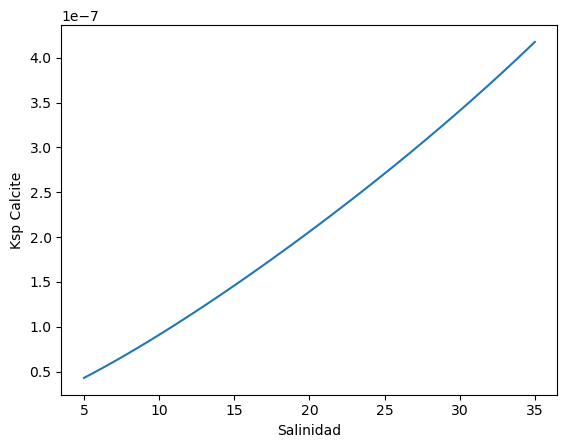

In [7]:
import matplotlib.pyplot as plt

# ===== Ksp f(S) ======
S = np.linspace(5,35,100)

Kspcal_S = Kspcal(S,35)

plt.plot(S,Kspcal_S)
plt.ylabel('Ksp Calcite')
plt.xlabel('Salinidad')

plt.savefig('Ksp vs S.png')

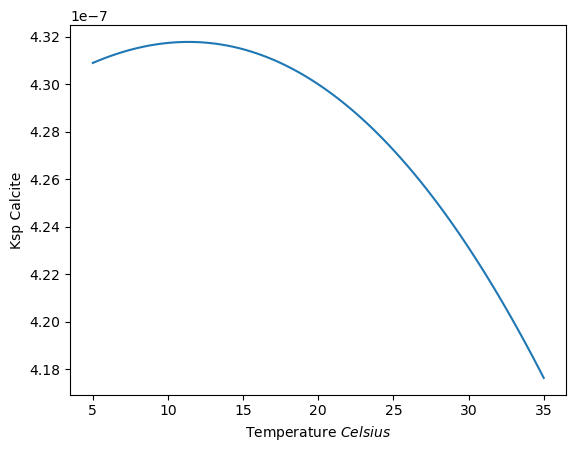

In [8]:
# ===== Ksp f(T) ======
T = np.linspace(5,35,100)

Kspcal_T = Kspcal(35,T)

plt.plot(T,Kspcal_T)
plt.ylabel('Ksp Calcite')
plt.xlabel('Temperature $Celsius$')

plt.savefig('Ksp vs T.png')

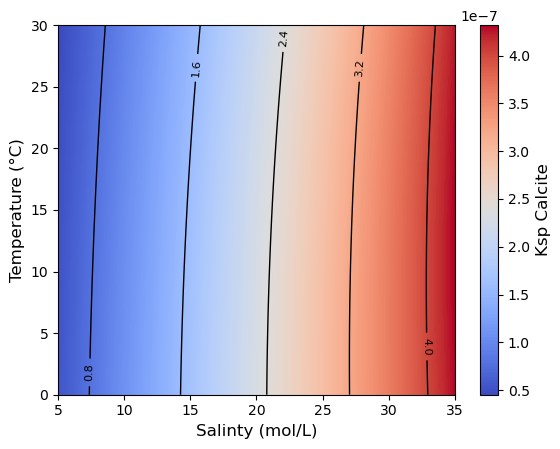

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import math
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show, contourf
import numpy

#======================================================================
# Generamos la función que hará los calculos del sistema carbonato =======
#======================================================================

#Aqui creamos la función que hará los cálculos

def Ksp_cal(S, TC):
    # Convertir temperatura Celsius a Kelvin
    T = TC + 273.15

    # Calcular los términos de la ecuación
    term1 = -171.9065 - 0.077993 * T + 2839.319 / T + 71.595 * np.log10(T)
    term2 = (-0.77712 + 0.0028426 * T + 178.34 / T) * S**0.5
    term3 = -0.07711 * S + 0.0041249 * S**1.5

    # Calcular log10(Kspcal)
    log_Kspcal = term1 + term2 + term3

    # Calcular Kspcal
    Kspcal = 10 ** log_Kspcal
    return Kspcal

################################  Vectorizamos los valores obtenidos #################################
#   Lo que hace np.vectorize(Ksp_cal) es crear una nueva versión de la función Ksp_cal (guardada
#   como vKsp_cal) que puede operar sobre arrays de entrada. Es decir, en lugar de tener que 
#   llamar a Ksp_cal para cada valor de un array individualmente, puedes pasarle un array completo
#   y vKsp_cal aplicará Ksp_cal a cada elemento de ese array, devolviendo un nuevo array con los resultados.

vKsp_cal = np.vectorize(Ksp_cal)

#======================================================================
# Generamos el diagrama =================================================
#======================================================================

S = numpy.linspace (5 , 35, 200)
TC = numpy.linspace (0, 30, 200)

S, TC =meshgrid(S,TC)


Ksp=vKsp_cal(S=S,TC=TC)

#==================================
# ============ Gráfico ===========
#==================================

xp=plt.imshow(Ksp, cmap=cm.coolwarm, aspect='auto',origin='lower',extent=(S.min(),S.max(),TC.min(),TC.max()))

cbar=plt.colorbar(xp) # Agrega la barra de colores de referencia

cbar.set_label('Ksp Calcite', fontsize=12) # Etiqueta de la referencia

contours = plt.contour(S, TC, Ksp, 5, colors='black', linewidths=1) # Ploteamos curvas negras de referencia

plt.clabel(contours, inline=True, fontsize=8) #Le agregamos valores a las curvas

# Le agregamos las etiquetas y otras condiciones del estilo

plt.xlabel('Salinty (mol/L)', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)

# Descargamos el archivo
plt.savefig('Ksp fan Diagram.png')
                
plt.show()

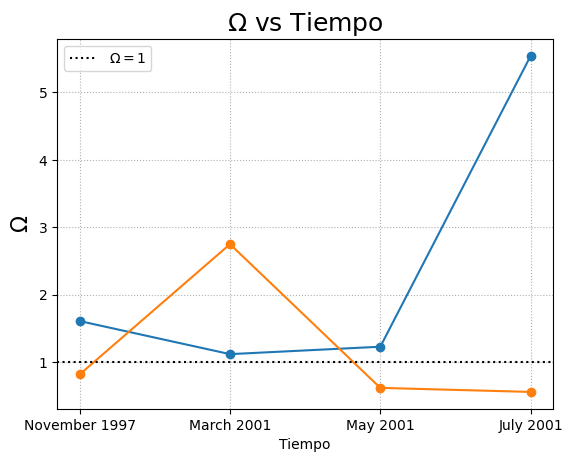

In [9]:
import matplotlib.pyplot as plt

#=======================================================
#=================Goland Sea============================
#=======================================================

# Creamos la lista de valores

fecha = ['November 1997','March 2001','May 2001','July 2001']

omega_cal = [1.61,1.12,1.23,5.54]

omega_ar = [0.82,2.75,0.62,0.56]

# Ploteamos

plt.plot(fecha , omega_cal , marker = 'o' )
plt.plot(fecha , omega_ar , marker = 'o')

# Linea de referencia

plt.axhline(y=1,c='k',linestyle='dotted',label=r'$\Omega=1$')


# Titulo y ejes

plt.title(r'$\Omega$ vs Tiempo',fontsize=18)
plt.ylabel(r'$\Omega$',fontsize=16)
plt.xlabel('Tiempo')
plt.legend(loc='best')

#Agregamos una grilla de linea de puntos

plt.grid(linestyle='dotted')

#Descarga
plt.savefig('Omega vs Season.png')

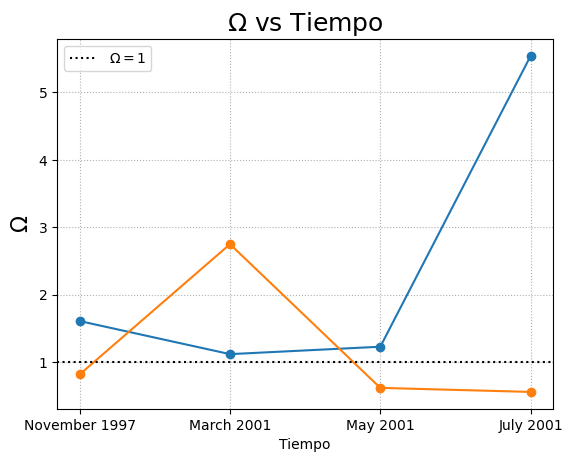

In [9]:
import matplotlib.pyplot as plt

#=======================================================
#=================Goland Sea============================
#=======================================================

# Creamos la lista de valores

fecha = ['Goland Sea','Riga Gulf','Botnia Bay']

omega_cal = [1.12,1.45,0.25]

omega_ar = [0.56,0,72,0.12]

# Ploteamos

plt.plot(fecha , omega_cal , marker = 'o' )
plt.plot(fecha , omega_ar , marker = 'o')

# Linea de referencia

plt.axhline(y=1,c='k',linestyle='dotted',label=r'$\Omega=1$')


# Titulo y ejes

plt.title(r'$\Omega$ vs Tiempo',fontsize=18)
plt.ylabel(r'$\Omega$',fontsize=16)
plt.xlabel('Tiempo')
plt.legend(loc='best')

#Agregamos una grilla de linea de puntos

plt.grid(linestyle='dotted')

#Descarga
plt.savefig('Omega vs Season.png')

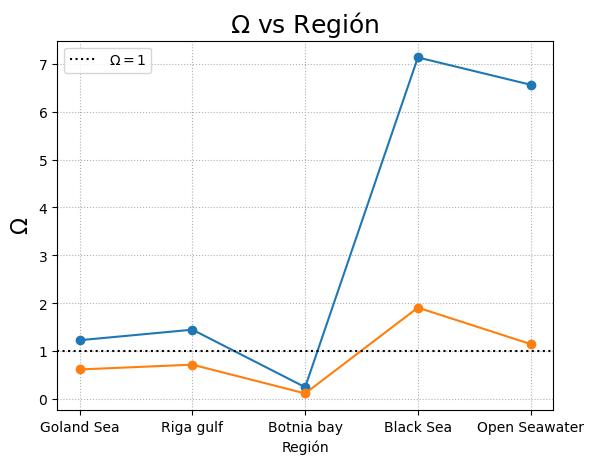

In [1]:
import matplotlib.pyplot as plt

#=======================================================
#=================Goland Sea============================
#=======================================================

# Creamos la lista de valores

region = ['Goland Sea','Riga gulf','Botnia bay','Black Sea','Open Seawater']

omega_cal = [1.23,1.45,0.25,7.13,6.56]
omega_ar = [0.62,0.72,0.12,1.91,1.15]

# Ploteamos

plt.plot(region , omega_cal , marker = 'o' )
plt.plot(region , omega_ar , marker = 'o')

# Linea de referencia

plt.axhline(y=1,c='k',linestyle='dotted',label=r'$\Omega=1$')

# Agregamos una grilla de linea de puntos

plt.grid(linestyle='dotted')

# Titulo y ejes

plt.title(r'$\Omega$ vs Región',fontsize=18)
plt.ylabel(r'$\Omega$',fontsize=16)
plt.xlabel('Región')
plt.legend(loc='best')

plt.savefig('Omega vs Región.png')

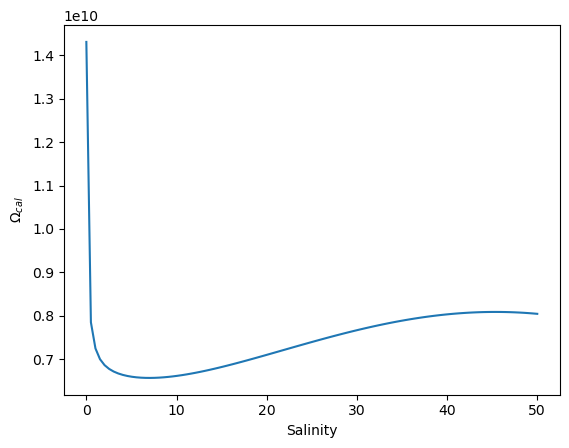

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# ... (your existing K0_weiss, K1_weiss, K2_weiss, Kspcal functions) ...

def CE_cal_S(S, TC1):
  # Use a loop to calculate CE_cal for each value of S
  CE_cal_values = []
  for s_val in S:
    a = K2_weiss(s_val, TC1) / (K1_weiss(s_val, TC1) * CO2)
    b = 1
    c = CO2 - DIC
    poli = [a, b, c]
    # Calculate roots for each individual s_val, not the entire S array
    roots_poli = np.roots(poli)
    CE_cal = ((0.331 * s_val + 0.392) * (((K2_weiss(s_val, TC1) * (max(roots_poli))**2)) / (K1_weiss(s_val, TC1) * CO2))) / Kspcal(s_val, TC1)
    CE_cal_values.append(CE_cal)
  return np.array(CE_cal_values)  # Convert the list to a NumPy array


S = np.linspace(0, 50, 100)
CE_cal_func = CE_cal_S(S, 7)

plt.plot(S, CE_cal_func)
plt.xlabel('Salinity')
plt.ylabel(r'$\Omega_{cal}$')
plt.show()